In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

os.chdir('C:\wzl\实习\data')

feature_list = ['lat', 'lon',
                        'TMP_P0_L1_GLL0', 'SPFH_P0_2L108_GLL0', 'RH_P0_L4_GLL0',
                        'PWAT_P0_L200_GLL0', 'UGRD_P0_L6_GLL0', 'GUST_P0_L1_GLL0',
                        'PRES_P0_L7_GLL0', 'CultivatedLand', 'WoodLand', 'GrassLand', 'Waters',
                        'UrbanRural', 'UnusedLand', 'Ocean', 'ELEVATION', 'AOD', 'month',
                        'year', 'weekday']
label_name = 'o3'

Make dataset

In [2]:
train = pd.read_csv('day\\train_set_daily_new.csv')
test = pd.read_csv('day\\test_set_daily_new.csv')
X_train, y_train, X_test, y_test = train[feature_list], train[label_name],test[feature_list],test[label_name]

Create model and train

In [3]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(tree_method='gpu_hist', gpu_id=0,learning_rate=0.01,max_depth=20,n_estimators=500)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

Evaluate

In [9]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_pred) + np.abs(y_test))) * 100
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
from confidence import confidence
conf = confidence(y_test,y_pred,20)

print("RMSE:", rmse)
print("SMAPE:", smape)
print("MAE:", mae)
print("R2:", r2)
print('confidence',conf)

RMSE: 14.03614003778449
SMAPE: 19.35659830026107
MAE: 10.498819134679975
R2: 0.7549184814859646
confidence 0.8668393938481005


In [5]:
feature_importance = xgb_model.feature_importances_

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'lat'),
  Text(1, 0, 'lon'),
  Text(2, 0, 'TMP_P0_L1_GLL0'),
  Text(3, 0, 'SPFH_P0_2L108_GLL0'),
  Text(4, 0, 'RH_P0_L4_GLL0'),
  Text(5, 0, 'PWAT_P0_L200_GLL0'),
  Text(6, 0, 'UGRD_P0_L6_GLL0'),
  Text(7, 0, 'GUST_P0_L1_GLL0'),
  Text(8, 0, 'PRES_P0_L7_GLL0'),
  Text(9, 0, 'CultivatedLand'),
  Text(10, 0, 'WoodLand'),
  Text(11, 0, 'GrassLand'),
  Text(12, 0, 'Waters'),
  Text(13, 0, 'UrbanRural'),
  Text(14, 0, 'UnusedLand'),
  Text(15, 0, 'Ocean'),
  Text(16, 0, 'ELEVATION'),
  Text(17, 0, 'AOD'),
  Text(18, 0, 'month'),
  Text(19, 0, 'year'),
  Text(20, 0, 'weekday')])

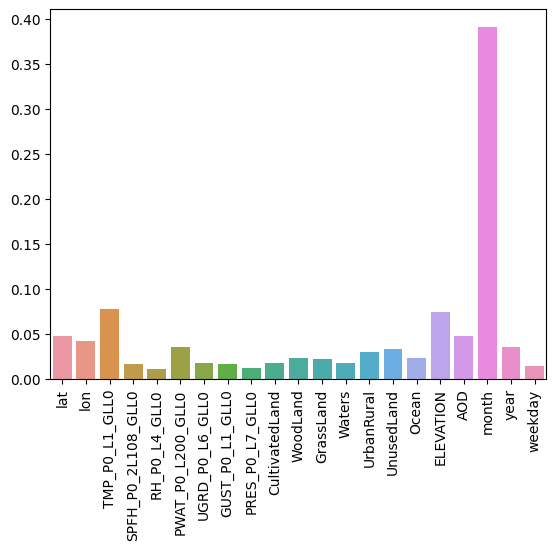

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = feature_list, y =feature_importance)
plt.xticks(rotation = 90)

In [7]:
    


importance_df = pd.DataFrame({'feature':feature_list,'importance':feature_importance/np.max(feature_importance)})
importance_df.to_csv('importance_XGB.csv')